### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [718]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [719]:
data = pd.read_csv('data/coupons.csv')

In [720]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [721]:
"""Display the shape of the dataset"""
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (12684, 26)


In [722]:
"""Display the total number of missing values in all the column"""
print(f"Total number of missing values: {data.isnull().sum().sum()}")

Total number of missing values: 13370


In [723]:
"""
# Display the columns types and missing values
"""
for col in data.columns:
    print(f"Column: {col:35} | Type: {str(data[col].dtype):7} | missing values: {data[col].isnull().sum():8}")

Column: destination                         | Type: object  | missing values:        0
Column: passanger                           | Type: object  | missing values:        0
Column: weather                             | Type: object  | missing values:        0
Column: temperature                         | Type: int64   | missing values:        0
Column: time                                | Type: object  | missing values:        0
Column: coupon                              | Type: object  | missing values:        0
Column: expiration                          | Type: object  | missing values:        0
Column: gender                              | Type: object  | missing values:        0
Column: age                                 | Type: object  | missing values:        0
Column: maritalStatus                       | Type: object  | missing values:        0
Column: has_children                        | Type: int64   | missing values:        0
Column: education                          

In [724]:
"""
# Display the statistics of the dataset
"""

data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [725]:
"""
# Display the number of duplicate rows
"""
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 74


In [726]:
"""
# Display the percentage of missing values in each column
"""
missing_values = data.isnull().sum() / len(data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Percentage of missing values']
missing_values.index.name = 'Column'
missing_values.reset_index(inplace=True)
missing_values

,Column,Percentage of missing values
0,car,99.148534
1,CoffeeHouse,1.710817
2,Restaurant20To50,1.490066
3,CarryAway,1.190476
4,RestaurantLessThan20,1.024913
5,Bar,0.843582


##### Findings
- The dataset contains 12,684 rows and 26 columns.
- There are 74 duplicate rows in the dataset.
- There are 6 columns with missing values: `car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20` and `Restaurant20To50`.
- The car column has lot of missing values i.e, over 99% of the data is missing almost rendering it useless.
- The rest of the columns have less than 2% of missing values.

3. Decide what to do about your missing data -- drop, replace, other...

##### Potential Solutions
- Drop the duplicate rows.
- Drop the `car` column since it has too many missing values.
- The percentage of missing values in the other columns is less than 2% so we can do either of the following:
    - drop the rows with missing values in those columns.
    - we can also replace the missing values with the mean or median of the column.

In [727]:
"""
# Drop the duplicate rows
"""
processed_data = data.drop_duplicates(keep=False)

In [728]:
"""
# Drop the car column
"""
processed_data = processed_data.drop(columns=['car'])

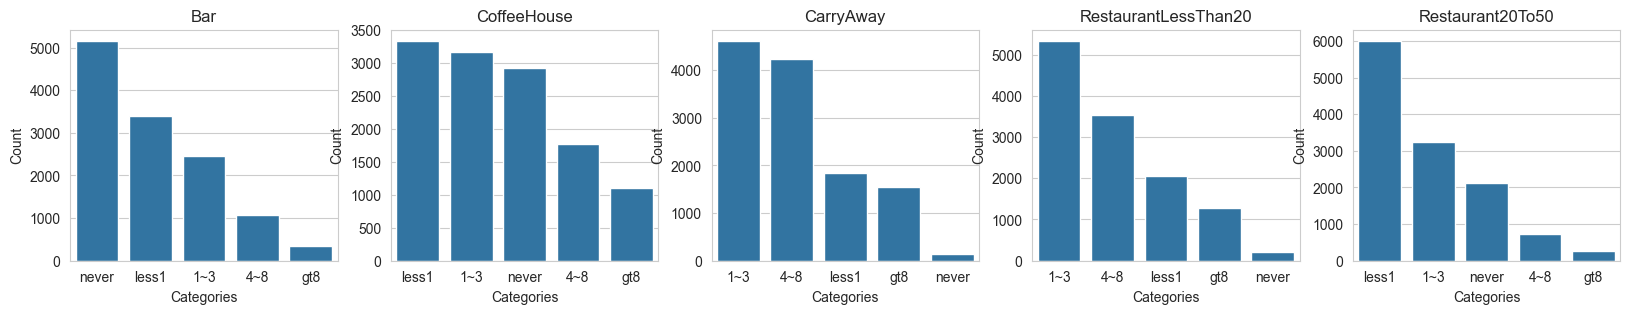

In [729]:
"""
# Display the bar plot of the columns with missing values to find the outliers and replace them with the mean, median or mode.
"""
missing_values_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
fig, axes = plt.subplots(1, len(missing_values_columns), figsize=(20, 3))
for i, col in enumerate(missing_values_columns):
    sns.barplot(x=processed_data[col].value_counts().index,
                y=processed_data[col].value_counts().values,
                ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')

#### Findings
- Replacing the missing values with the mode of the column since the columns are categorical.

In [730]:
# Compute the mode for the selected columns
modes = processed_data[missing_values_columns].mode()
for col in missing_values_columns:
     processed_data[col] = processed_data[col].fillna(modes[col][0])

"""Display the total number of missing values in all the column"""
print(f"Total number of missing values: {processed_data.isnull().sum().sum()}")

Total number of missing values: 0


4. What proportion of the total observations chose to accept the coupon?



In [731]:

"""
# Change the coupon acceptance from 1 and 0 to Yes and No in a new column
"""
processed_data['Accepted'] = processed_data['Y'].replace({1: 'Yes', 0: 'No'})

Text(0, 0.5, 'Count')

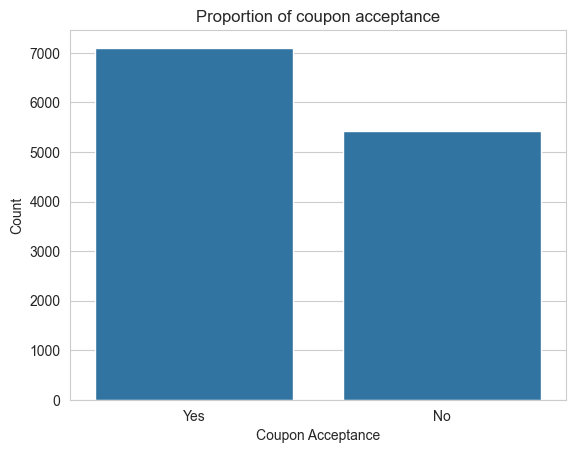

In [732]:
sns.countplot(processed_data, x="Accepted")
fig.set_size_inches(10, 5)
plt.title("Proportion of coupon acceptance")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Count")

In [733]:
"""
# Display the proportion of coupon acceptance
"""
proportion_acceptance = processed_data['Accepted'].value_counts(normalize=True) * 100
proportion_acceptance_table = pd.DataFrame(proportion_acceptance)
proportion_acceptance_table.columns = ['Proportion of coupon acceptance']
proportion_acceptance_table.index.name = 'Coupon Accepted'
proportion_acceptance_table.reset_index(inplace=True)
proportion_acceptance_table

,Coupon Accepted,Proportion of coupon acceptance
0,Yes,56.668794
1,No,43.331206


#### Findings
-  The proportion of coupon acceptance is 57% and the proportion of coupon rejection is 43%.
-  The acceptance rate is higher than the rejection rate.

5. Use a bar plot to visualize the `coupon` column.

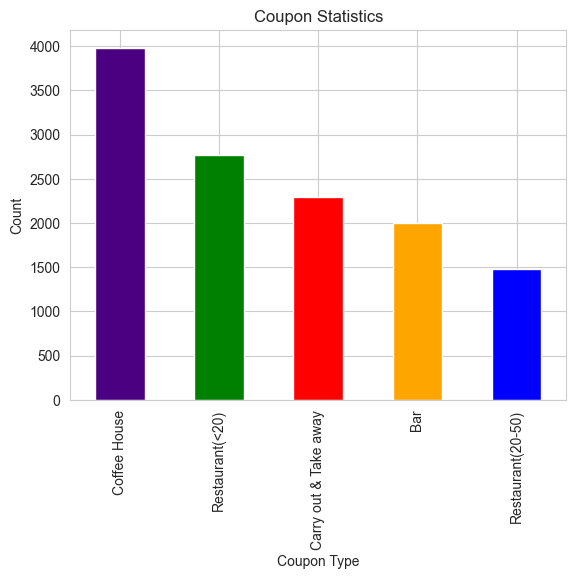

coupon
Coffee House             31.764518
Restaurant(<20)          22.112317
Carry out & Take away    18.307275
Bar                      15.977983
Restaurant(20-50)        11.837907
Name: proportion, dtype: float64

In [734]:
processed_data['coupon'].value_counts().plot(kind='bar', color=['indigo', 'green', 'red', 'orange', 'blue'])
plt.title("Coupon Statistics")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.show()

"""
# Display the percentage of bar coupon from the total coupons
"""
processed_data['coupon'].value_counts(normalize=True) * 100

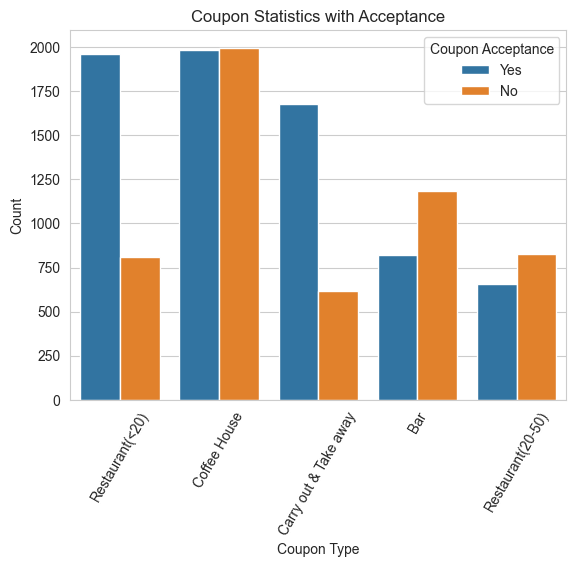

In [735]:
"""
# add hue to the bar plot with Y column
"""
sns.countplot(data=processed_data, x='coupon', hue='Accepted')
plt.title("Coupon Statistics with Acceptance")
plt.xlabel("Coupon Type")
plt.xticks(rotation=60)
plt.ylabel("Count")
plt.legend(title='Coupon Acceptance')
plt.show()


##### Findings from the bar plot
- The most common coupon type is `Coffee House` with 32% of the total coupons.
- The least common coupon type is `Restaurant20To50` with 12% of the total coupons.
- The acceptance rate is highest for `Carry out & Take away`.
- The acceptance rate is lowest for `Bar` as orange color bar is higher than the blue color bar.

6. Use a histogram to visualize the temperature column.

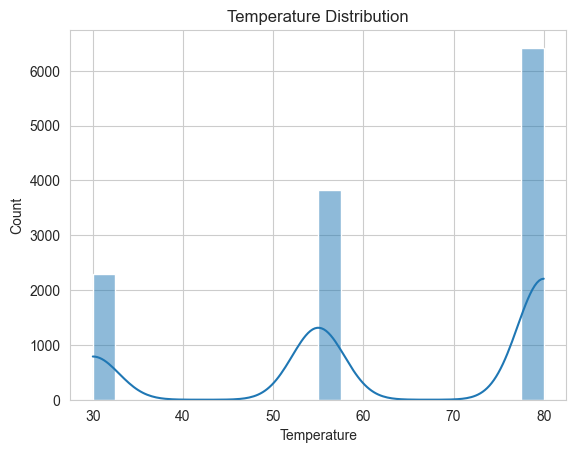

In [736]:
"""
# Display the histogram of the temperature column
"""
sns.histplot(processed_data['temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

#### Findings
- From the temparature statistics in the starting data sets stats, we can see that the temperature has unique values of 30, 55 and 80. The temperature is not continuous but categorical.
- Looking at the histogram, we can see that temperature 80 has the highest count while 30 has the lowest count.
- This is expected since the temperature is a categorical variable with only 3 unique values. The low count for 30 make sense and can be attributed due to the fact that it is a cold temperature and people are less likely to drive in cold weather.




**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.

1. Create a new `DataFrame` that contains just the bar coupons.


In [737]:
"""
# change the dataset to have the has_children column to be yes and no
"""
processed_data['children'] = processed_data['has_children'].replace({1: 'Yes', 0: 'No'})

"""
# Create a new DataFrame that contains just the bar coupons
"""
bar_coupons = processed_data[processed_data['coupon'] == 'Bar']
print(f"Shape of the bar coupons dataset: {bar_coupons.shape}")

Shape of the bar coupons dataset: (2003, 27)


#### Findings
- The shape of the bar coupons dataset is (2003, 25) which means that there are 2003 rows and 25 columns.

2. What proportion of bar coupons were accepted?


In [738]:
"""
# Display the proportion of bar coupon acceptance
"""
proportion_bar_acceptance = bar_coupons['Accepted'].value_counts(normalize=True) * 100
proportion_bar_acceptance_table = pd.DataFrame(proportion_bar_acceptance)
proportion_bar_acceptance_table.columns = ['Proportion of bar coupon acceptance']
proportion_bar_acceptance_table.index.name = 'Bar Coupon Accepted'
proportion_bar_acceptance_table.reset_index(inplace=True)
proportion_bar_acceptance_table

,Bar Coupon Accepted,Proportion of bar coupon acceptance
0,No,59.011483
1,Yes,40.988517


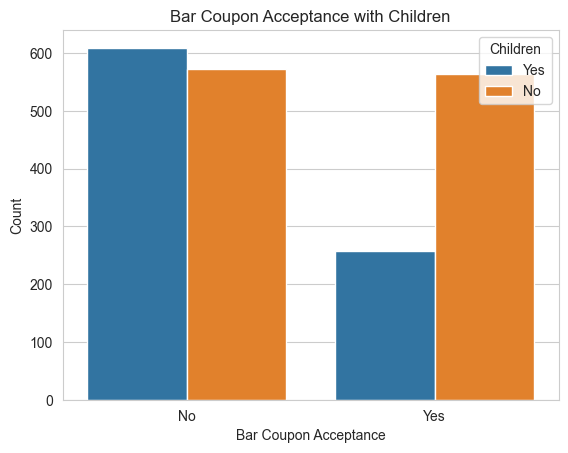

In [739]:

"""
# Display the bar plot of the bar coupon with children and without children and with the temperature
"""
sns.countplot(data=bar_coupons, x='Accepted', hue='children')
plt.title("Bar Coupon Acceptance with Children")
plt.xlabel("Bar Coupon Acceptance")
plt.ylabel("Count")
plt.legend(title='Children')
plt.show()

#### Findings
- The proportion of bar coupon acceptance is 41% and the proportion of bar coupon rejection is 59%.
- The acceptance rate is lower than the rejection rate.
- This is expected since the drivers are not supposed to drink and drive.
- The acceptance rate is higher for those who don't have children in the car.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


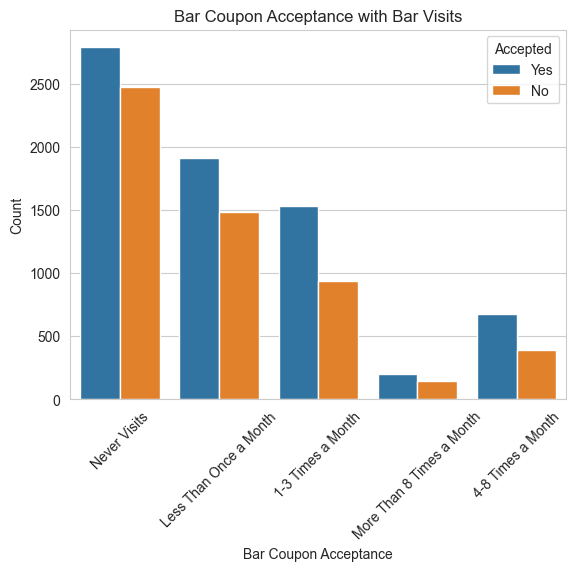

In [740]:
"""
# Creating a map for Bar visit to more descriptive English words instead of mix of numbers and words
"""
bar_visit_map = {
    'never': 'Never Visits',
    'less1': 'Less Than Once a Month',
    '1~3': '1-3 Times a Month',
    '4~8': '4-8 Times a Month',
    'gt8': 'More Than 8 Times a Month'
}
processed_data['BarVisits'] = processed_data['Bar'].replace(bar_visit_map)

# Creating a bar plot
sns.countplot(data=processed_data, x='BarVisits', hue='Accepted')
plt.title("Bar Coupon Acceptance with Bar Visits")
plt.xlabel("Bar Coupon Acceptance")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


Text(0.5, 1.0, 'Bar Coupon Acceptance Rate')

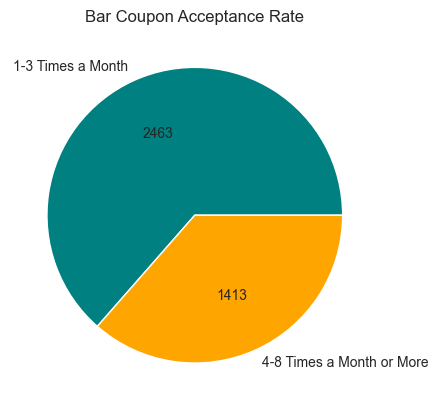

In [741]:
"""
# Compare the acceptance rate between those who went to a bar 1-3 Times a Month a month to those who went more.
"""
group_1_3 = processed_data.query('BarVisits == "1-3 Times a Month"')['Y'].count()
group_more = processed_data.query('BarVisits == "4-8 Times a Month" or BarVisits=="More Than 8 Times a Month"')['Y'].count()

# drawing the pie chart
labels = ['1-3 Times a Month', '4-8 Times a Month or More']
sizes = [group_1_3, group_more]
colors = ['teal', 'orange']
plt.pie(sizes, labels=labels, autopct=lambda x: '{:.0f}'.format(x/100*(group_1_3 + group_more)), colors=colors)
plt.title("Bar Coupon Acceptance Rate")


#### Findings
- The acceptance rate is higher for those who go to a bar 1-3 times a month than those who go to a bar 4-8 times a month or more by 74% computed using (2463 - 1413)/1413 * 100%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [742]:
"""
# unique the age column to get the unique values
"""
processed_data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [743]:
"""
# Map the age column to more descriptive English words instead of mix of numbers and words
# array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)
"""
age_map = {
    'below21': '0-21',
    '21': '21-25',
    '26': '26-30',
    '31': '31-35',
    '36': '36-40',
    '41': '41-45',
    '46': '46-50',
    '50plus': '50-99'
}
processed_data['age_normalized'] = processed_data['age'].replace(age_map)
processed_data['age_normalized'] = processed_data['age_normalized'].astype('category')
processed_data['age_normalized'].unique()


['21-25', '46-50', '26-30', '31-35', '41-45', '50-99', '36-40', '0-21']
Categories (8, object): ['0-21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50-99']

In [744]:
"""
# Percentage Acceptance rate for those who go to a bar more than once a month than others
"""
processed_data_age = processed_data[processed_data['age_normalized'].isin(['46-50', '26-30', '31-35', '41-45', '50-99', '36-40'])]
processed_data_age_bar_greater_than_month = processed_data_age[~processed_data_age['BarVisits'].isin(['Never Visits', 'Less Than Once a Month'])]

# All other criteria
processed_data_age_others = processed_data[~processed_data.index.isin(processed_data_age_bar_greater_than_month.index)]

table = pd.DataFrame({'Bar Visits': ['Other Conditions', 'More Than Once a Month and age > 25'],
                     'Acceptance Rate': [processed_data_age_others['Y'].sum() / (processed_data_age_others['Y'].count()) * 100,
                                         processed_data_age_bar_greater_than_month['Y'].sum() / (processed_data_age_bar_greater_than_month['Y'].count()) * 100]})
table.set_index('Bar Visits', inplace=True)
table.columns = ['Acceptance Rate']
table.index.name = 'Bar Visits'
table.reset_index(inplace=True)
table



,Bar Visits,Acceptance Rate
0,Other Conditions,55.199918
1,More Than Once a Month and age > 25,61.878854


##### Findings
- The acceptance rate is lesser for those who go to a bar more than once a month and are over the age of 25 than everyone else.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [745]:
"""
# unique the occupation column to get the unique values
"""
processed_data['occupation'].unique()
print(f"Unique values in the occupation column: {processed_data['occupation'].unique()}")
"""
# Get the drivers who go to bar more than once a month
"""
processed_data_bar_greater_than_month = processed_data[~processed_data['BarVisits'].isin(['Never Visits', 'Less Than Once a Month'])]
processed_data_bar_greater_than_month.head()

Unique values in the occupation column: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Accepted,children,BarVisits,age_normalized
88,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,1,0,0,0,1,0,No,No,1-3 Times a Month,21-25
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,1,0,0,0,1,1,Yes,No,1-3 Times a Month,21-25
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,Yes,No,1-3 Times a Month,21-25
91,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,1,1,0,0,1,1,Yes,No,1-3 Times a Month,21-25
92,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,1,0,0,0,1,1,Yes,No,1-3 Times a Month,21-25


In [746]:
"""
# Rename the passanger column to passenger
"""
processed_data_5 = processed_data_bar_greater_than_month.rename(columns={'passanger': 'passenger'})

processed_data_5['passenger'].unique()
print(f"Unique values in the passenger column: {processed_data_5['passenger'].unique()}")
"""
# Get the drivers who had passengers that were not a kid/s.
"""
processed_data_5 = processed_data_5[~processed_data_5['passenger'].isin(['Kid(s)'])]
processed_data_5.head()
processed_data_5.shape

Unique values in the passenger column: ['Alone' 'Friend(s)' 'Partner' 'Kid(s)']


(3674, 29)

In [747]:
"""
# Get the drivers who had occupations other than farming, fishing, or forestry.
"""
processed_data_drivers_all_criteria = processed_data_5[~processed_data_5['occupation'].isin(['Farming Fishing & Forestry'])]

"""
# Fetch all other drivers who are not meeting the above criteria
"""
processed_data_drivers_others = processed_data[~processed_data.index.isin(processed_data_drivers_all_criteria.index)]

print(f"Shape of the processed data drivers who are meeting the above criteria: {processed_data_drivers_others.shape}")
print(f"Shape of the processed data drivers who are meeting the above criteria: {processed_data_drivers_all_criteria.shape}")


Shape of the processed data drivers who are meeting the above criteria: (8862, 29)
Shape of the processed data drivers who are meeting the above criteria: (3674, 29)


In [748]:
"""
# Display the percentage acceptance rate for the drivers who are meeting the above criteria
"""

table = pd.DataFrame({'Bar Visits': ['All Other Drivers',
                                     'Drivers with Passengers that are not a kid and not in farming, fishing, or forestry'],
                     'Acceptance Rate': [processed_data_drivers_others['Y'].sum() / (processed_data_drivers_others['Y'].count()) * 100,
                                         processed_data_drivers_all_criteria['Y'].sum() / (processed_data_drivers_all_criteria['Y'].count()) * 100]})
table.set_index('Bar Visits', inplace=True)
table.columns = ['Acceptance Rate (%)']
table.index.name = 'Bar Visits'
table.reset_index(inplace=True)
table




,Bar Visits,Acceptance Rate (%)
0,All Other Drivers,54.400812
1,Drivers with Passengers that are not a kid and...,62.139358


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [749]:
"""
# Rename passanger to passenger
"""
processed_data = processed_data.rename(columns={'passanger': 'passenger'})

"""
# Compute the dataframe for the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
"""

processed_data_group1 = processed_data[~processed_data['BarVisits'].isin(['Never Visits', 'Less Than Once a Month'])]
processed_data_group1 = processed_data_group1[~processed_data_group1['passenger'].isin(['Kid(s)'])]
processed_data_group1 = processed_data_group1[~processed_data_group1['maritalStatus'].isin(['Widowed'])]
processed_data_group1.shape

(3674, 29)

In [750]:
"""
# Compute the dataframe for the drivers who go to bars more than once a month and are under the age of 30
"""

processed_data_group2 = processed_data[~processed_data['BarVisits'].isin(['Never Visits', 'Less Than Once a Month'])]
processed_data_group2 = processed_data_group2[processed_data_group2['age_normalized'].isin(['0-21', '21-25', '26-30'])]
processed_data_group2.shape

(2260, 29)

In [751]:
"""
# Compute the dataframe for the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
"""

processed_data_group3 = processed_data[processed_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
processed_data_group3 = processed_data_group3[processed_data_group3['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
processed_data_group3.shape

(2259, 29)

In [752]:
"""
# Display the percentage acceptance and rejection rate for the drivers who are meeting the above criteria
# Compute the acceptance rate for each group
"""

table = pd.DataFrame({'Bar Visits': ['Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed',
                                     'Drivers who go to bars more than once a month and are under the age of 30',
                                     'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K'],
                     'Acceptance Rate': [processed_data_group1['Y'].sum() / ( processed_data_group1['Y'].count()) * 100,
                                         processed_data_group2['Y'].sum() / (processed_data_group2['Y'].count()) * 100,
                                         processed_data_group3['Y'].sum() / ( processed_data_group3['Y'].count()) * 100]})
table.set_index('Bar Visits', inplace=True)
table.columns = ['Acceptance Rate (%)']
table.index.name = 'Bar Visits'
table.reset_index(inplace=True)
table


,Bar Visits,Acceptance Rate (%)
0,"Drivers who go to bars more than once a month,...",62.139358
1,Drivers who go to bars more than once a month ...,62.699115
2,Drivers who go to cheap restaurants more than ...,59.982293


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Findings
- 57% of the drivers accepted the coupons and 43% of the drivers rejected the coupons.
- There are 16% of bar coupons from all the coupons.
- The bar acceptance rate is lower i.e, the number of bar coupons accepted (41%) were less than the number of bar coupons (59's) rejected.
- The drivers who accepted the bar coupons have no children than the drivers who have children. So, looks like the drivers who have family are less likely to accept the bar coupons.
- The drivers who accepted the bar coupons are often visited bars more than once and have age more than 25 years. This means, the driver if he is around than 25 - 30 years of age and visited the bar even once, the chance of accepting the coupon is more.
- Drivers who are not travelling with passenger kids, and were not widowed have higher acceptance rate. This means that socializing with friends/someone is more likely to lead to acceptance of the bar coupon.
- Drivers with passengers that are not kids and occupations other than farming, fishing, or forestry show a higher acceptance rate.
- There is a relationship between the drivers with lower income who frequently visit cheap restaurants also show a higher acceptance rate for bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

####  carry out and take away coupons
- This investigation will investigate about the carry out and take away.
- The carry out and take away coupons are the most common coupons with 20% of the total coupons.
- It has high acceptance rate than rejection rate.

In [753]:
"""
# Create a new DataFrame that contains just the carry out and take away coupons
"""
carry_out_coupons = processed_data[processed_data['coupon'] == 'Carry out & Take away']
print(f"Shape of the carry out coupons dataset: {carry_out_coupons.shape}")

Shape of the carry out coupons dataset: (2295, 29)


In [754]:
"""
# Display the proportion of carry out coupon acceptance
"""
proportion_carry_out_acceptance = carry_out_coupons['Accepted'].value_counts(normalize=True) * 100
proportion_carry_out_acceptance_table = pd.DataFrame(proportion_carry_out_acceptance)
proportion_carry_out_acceptance_table.columns = ['Proportion of carry out coupon acceptance']
proportion_carry_out_acceptance_table.index.name = 'Carry out Coupon Accepted'
proportion_carry_out_acceptance_table.reset_index(inplace=True)
proportion_carry_out_acceptance_table

,Carry out Coupon Accepted,Proportion of carry out coupon acceptance
0,Yes,73.202614
1,No,26.797386


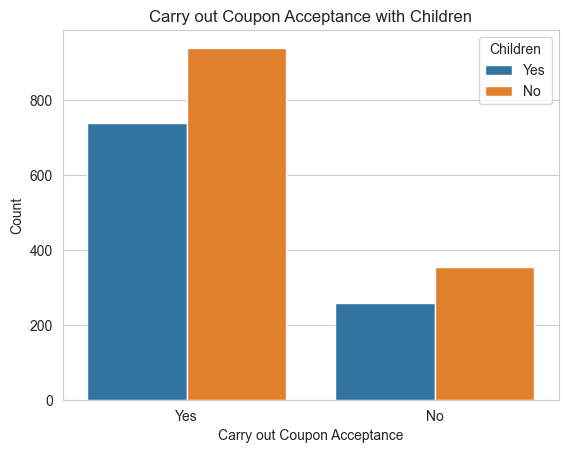

In [755]:
"""
# Display the bar plot of the carry out coupon with children and without children and with the temperature
"""
sns.countplot(data=carry_out_coupons, x='Accepted', hue='children')
plt.title("Carry out Coupon Acceptance with Children")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.legend(title='Children')
plt.show()

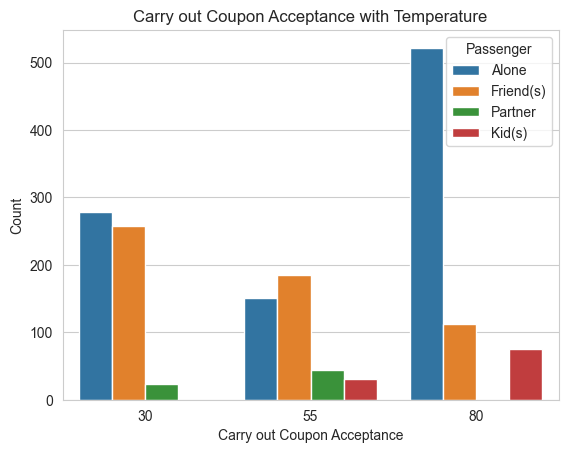

In [756]:
"""
# Display the percentage of carry out coupon based on the temperature and passenger
"""
carry_out_coupons_accepted = carry_out_coupons[carry_out_coupons['Accepted'] == 'Yes']
sns.countplot(data=carry_out_coupons_accepted, x='temperature', hue='passenger')
plt.title("Carry out Coupon Acceptance with Temperature")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.legend(title='Passenger')
plt.show()

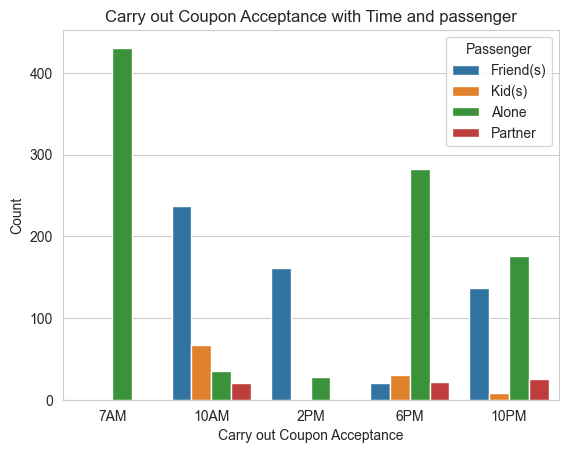

In [757]:
custom_sort_order = ['7AM', '10AM', '2PM', '6PM', '10PM']

# sort based on the custom sort order
sns.countplot(data=carry_out_coupons_accepted, x='time', hue='passenger', order=custom_sort_order)
plt.title("Carry out Coupon Acceptance with Time and passenger")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.legend(title='Passenger')
plt.show()

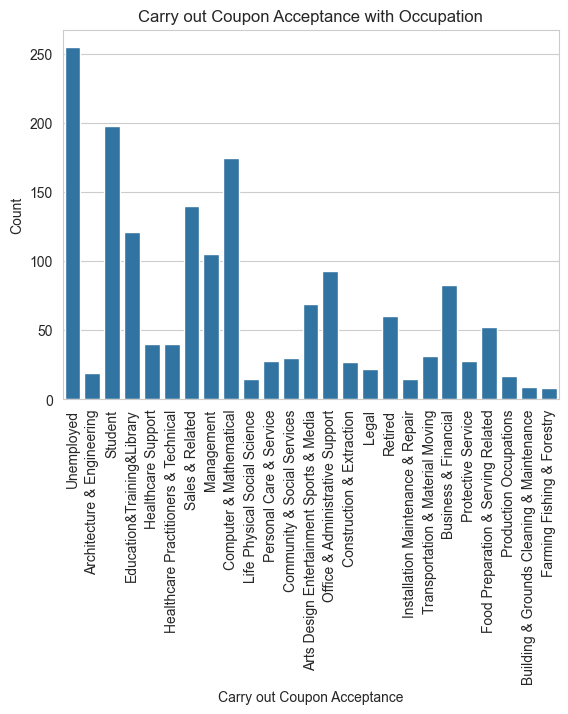

In [758]:
"""
#  Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
"""
carry_out_coupons_accepted = carry_out_coupons[carry_out_coupons['Accepted'] == 'Yes']
sns.countplot(data=carry_out_coupons_accepted, x='occupation')
plt.title("Carry out Coupon Acceptance with Occupation")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [760]:
"""
# Compare the acceptance rate of the age among the unemployed and the student
"""
## acceptance rate for all the occupations
occupations = carry_out_coupons['occupation'].value_counts(normalize=True) * 100
occupations = pd.DataFrame(occupations)
occupations.columns = ['Proportion of carry out coupon acceptance']
occupations.index.name = 'Occupation'
occupations.reset_index(inplace=True)
occupations

## Also add how many coupons were accepted from total coupons
carry_out_coupons_accepted = carry_out_coupons[carry_out_coupons['Accepted'] == 'Yes']
## loop for each occupation and get the count of coupons accepted
for occupation in occupations['Occupation']:
    count = carry_out_coupons[carry_out_coupons['occupation'] == occupation]['occupation'].count()
    accepted_count = carry_out_coupons_accepted[carry_out_coupons_accepted['occupation'] == occupation]['occupation'].count()
    occupations.loc[occupations['Occupation'] == occupation, 'Count'] = count
    occupations.loc[occupations['Occupation'] == occupation, 'Accepted Count'] = accepted_count
    # compute the acceptance rate percentage
    occupations.loc[occupations['Occupation'] == occupation, 'Acceptance Rate (%)'] = accepted_count / count * 100

# sort by the  acceptance rate
occupations = occupations.sort_values(by='Acceptance Rate (%)', ascending=False)
occupations





,Occupation,Proportion of carry out coupon acceptance,Count,Accepted Count,Acceptance Rate (%)
24,Building & Grounds Cleaning & Maintenance,0.392157,9.0,9.0,100.000000
18,Protective Service,1.263617,29.0,28.0,96.551724
19,Construction & Extraction,1.220044,28.0,27.0,96.428571
12,Healthcare Practitioners & Technical,1.960784,45.0,40.0,88.888889
11,Healthcare Support,2.091503,48.0,40.0,83.333333
10,Food Preparation & Serving Related,2.745098,63.0,52.0,82.539683
15,Transportation & Material Moving,1.655773,38.0,31.0,81.578947
8,Business & Financial,4.444444,102.0,83.0,81.372549
23,Farming Fishing & Forestry,0.435730,10.0,8.0,80.000000
22,Production Occupations,0.958606,22.0,17.0,77.272727


In [761]:
"""
# Compare the acceptance rate between drivers who chose carry out more than once a month and are between the age of 25-35 to the all others.  Is there a difference?
"""
## Group visting the carry out more than once a month
carry_out_coupons_group1 = carry_out_coupons[~carry_out_coupons['CarryAway'].isin(['Never Visits', 'Less Than Once a Month']) &
                                             ~carry_out_coupons['age_normalized'].isin(['25-30', '31-35'])]

## All other criteria
carry_out_coupons_group2 = carry_out_coupons[~carry_out_coupons.index.isin(carry_out_coupons_group1.index)]
## Display the acceptance rate for each group
table = pd.DataFrame({'Carry Out Visits': ['Other Conditions',
                                            'Drivers who go to carry out more than once a month and are over the age of 25'],
                     'Acceptance Rate': [carry_out_coupons_group2['Y'].sum() / (carry_out_coupons_group2['Y'].count()) * 100,
                                         carry_out_coupons_group1['Y'].sum() / (carry_out_coupons_group1['Y'].count()) * 100]})
table.set_index('Carry Out Visits', inplace=True)
table.columns = ['Acceptance Rate (%)']
table.index.name = 'Carry Out Visits'
table.reset_index(inplace=True)
table



,Carry Out Visits,Acceptance Rate (%)
0,Other Conditions,70.00000
1,Drivers who go to carry out more than once a m...,73.83812


##### Q. Compare the acceptance rates between those drivers who:
- who carry out more than once a month and have incomes less than 50K.


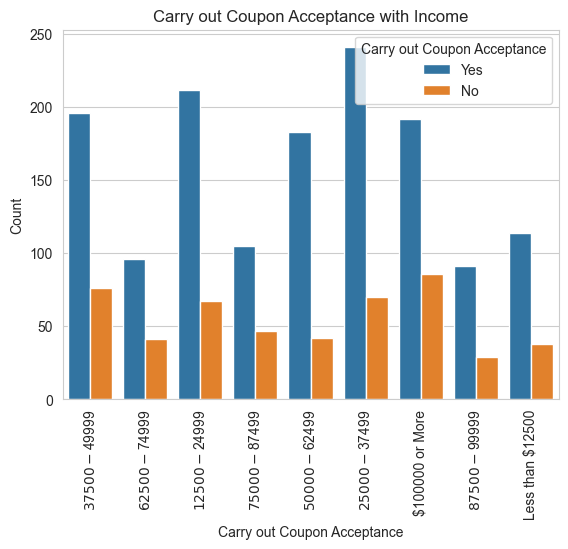

In [762]:
"""
# Compute the dataframe for the drivers who go to carry out more than once a month and income.
"""
carry_out_coupons_group1 = carry_out_coupons[carry_out_coupons['CarryAway'].isin(['1~3','4~8', 'gt8'])]

# Count plot based on the income
sns.countplot(data=carry_out_coupons_group1, x='income', hue='Accepted')
plt.title("Carry out Coupon Acceptance with Income")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Carry out Coupon Acceptance')
plt.show()


In [763]:
"""
# Compare the percentage acceptance rate for the drivers among the different income ranges
"""
## acceptance rate for all the occupations
occupations = carry_out_coupons['income'].value_counts(normalize=True) * 100
occupations = pd.DataFrame(occupations)
occupations.columns = ['Proportion of carry out coupon acceptance']
occupations.index.name = 'Income'
occupations.reset_index(inplace=True)
## loop for each occupation and get the count of coupons accepted
for income in occupations['Income']:
    count = carry_out_coupons[carry_out_coupons['income'] == income]['income'].count()
    accepted_count = carry_out_coupons_accepted[carry_out_coupons_accepted['income'] == income]['income'].count()
    occupations.loc[occupations['Income'] == income, 'Count'] = count
    occupations.loc[occupations['Income'] == income, 'Accepted Count'] = accepted_count
    # compute the acceptance rate percentage
    occupations.loc[occupations['Income'] == income, 'Acceptance Rate (%)'] = accepted_count / count * 100
    # sort by the  acceptance rate
occupations = occupations.sort_values(by='Acceptance Rate (%)', ascending=False)
occupations


,Income,Proportion of carry out coupon acceptance,Count,Accepted Count,Acceptance Rate (%)
0,$25000 - $37499,16.034858,368.0,288.0,78.260870
4,$50000 - $62499,12.461874,286.0,219.0,76.573427
1,$12500 - $24999,14.466231,332.0,249.0,75.000000
5,Less than $12500,8.540305,196.0,147.0,75.000000
8,$62500 - $74999,6.579521,151.0,108.0,71.523179
2,$37500 - $49999,13.986928,321.0,227.0,70.716511
7,$87500 - $99999,7.102397,163.0,115.0,70.552147
3,$100000 or More,13.551198,311.0,216.0,69.453376
6,$75000 - $87499,7.276688,167.0,111.0,66.467066


#### Q. Compare the acceptance rates between those drivers who:
- go to carry out atleast once a month vs those who go to carry out more than once a month.


In [764]:
carry_out_coupons['CarryAway'].unique()

"""
# Compute the dataframe for the drivers who go to carry out atmost once a month vs those who go to carry out more than once a month.
"""
carry_out_coupons_group1 = carry_out_coupons[carry_out_coupons['CarryAway'].isin(['1~3','4~8', 'gt8'])]
carry_out_coupons_group2 = carry_out_coupons[carry_out_coupons['CarryAway'].isin(['less1', 'never'])]
## Display the acceptance rate for each group
table = pd.DataFrame({'Carry Out Visits': ['Carry Out atmost Once a Month',
                                            'Drivers who go to carry out more than once a month'],
                     'Acceptance Rate': [carry_out_coupons_group2['Y'].sum() / (carry_out_coupons_group2['Y'].count()) * 100,
                                         carry_out_coupons_group1['Y'].sum() / (carry_out_coupons_group1['Y'].count()) * 100]})
table.set_index('Carry Out Visits', inplace=True)
table.columns = ['Acceptance Rate (%)']
table.index.name = 'Carry Out Visits'
table.reset_index(inplace=True)
table

,Carry Out Visits,Acceptance Rate (%)
0,Carry Out atmost Once a Month,67.750678
1,Drivers who go to carry out more than once a m...,74.247144


 #### Q. Is there a relationship between the driver carrying out and the weather?

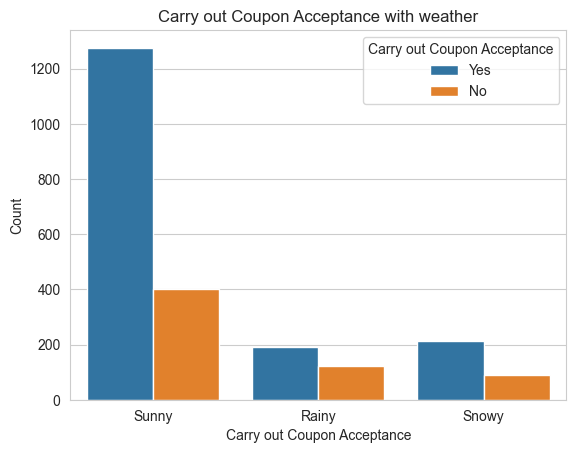

In [766]:
"""
# Display the acceptance rate of the carry out coupon based on the weather
"""
sns.countplot(data=carry_out_coupons, x='weather', hue='Accepted')
plt.title("Carry out Coupon Acceptance with weather")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.legend(title='Carry out Coupon Acceptance')
plt.show()



#### Q. Is there a relationship between the driver carrying out and the destination and the direction?


In [768]:
"""
# Change the direction_same binary column to more descriptive English words instead of mix of numbers and words
"""
carry_out_coupons.loc[:, 'direction_processed'] = carry_out_coupons['direction_same'].replace({1: 'Same', 0: 'Opposite'})


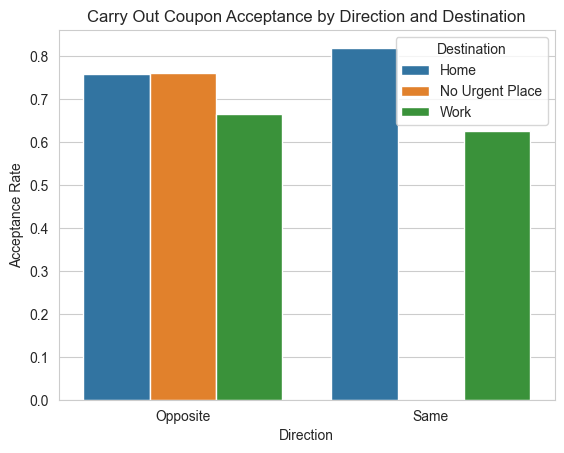

In [769]:

"""
# Display the acceptance rate of the carry out coupon based on the direction and destination
"""

# Group the data by weather and destination, and calculate the acceptance rate
carry_out_direction_destination = carry_out_coupons.groupby(['direction_processed', 'destination'])['Y'].mean().reset_index()

# Create a grouped bar plot
sns.barplot(data=carry_out_direction_destination, x='direction_processed', y='Y', hue='destination')
plt.title("Carry Out Coupon Acceptance by Direction and Destination")
plt.xlabel("Direction")
plt.ylabel("Acceptance Rate")
plt.legend(title="Destination")
plt.show()

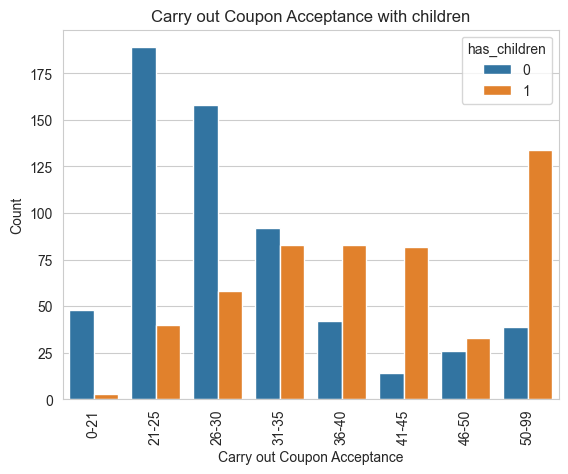

In [770]:
"""
# Demographics of the drivers who accepted the carry out coupons and driving in opposite direction
"""
carry_out_coupons_opposite = carry_out_coupons[carry_out_coupons['direction_processed'] == 'Opposite']
carry_out_coupons_opposite = carry_out_coupons_opposite[carry_out_coupons_opposite['Accepted'] == 'Yes']
sns.countplot(data=carry_out_coupons_opposite, x='age_normalized', hue='has_children')
plt.title("Carry out Coupon Acceptance with children")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

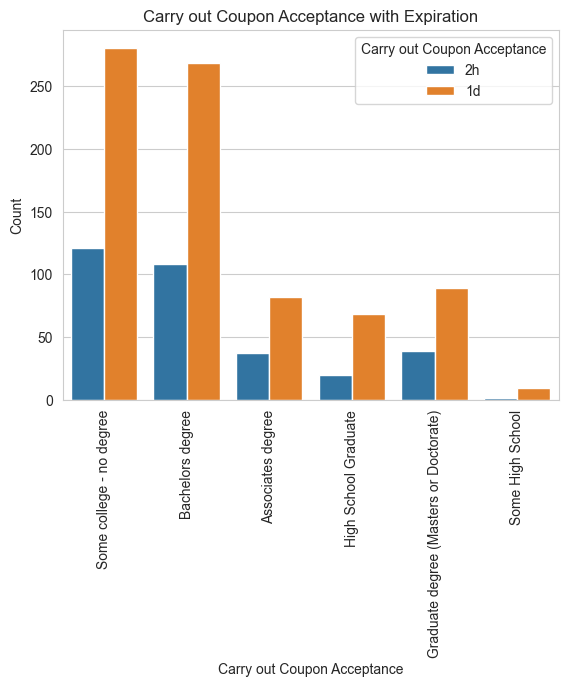

In [771]:
"""
# From the above plot, we can see that the drivers who accepted the carry out coupons and driving in opposite direction are mostly aged between 26-30 and have children.
# Is there a relationship between the driver carrying out, education and the expiration time?
"""

sns.countplot(data=carry_out_coupons_opposite, x='education', hue='expiration')
plt.title("Carry out Coupon Acceptance with Expiration")
plt.xlabel("Carry out Coupon Acceptance")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Carry out Coupon Acceptance')
plt.show()



.#### Findings
- Carry-out coupons account for 18% of all distributed coupons.
- The acceptance rate for Carry-out & Takeaway coupons is relatively high at 74%, with a low rejection rate of 26%, outperforming other coupon types.
- There is no observable relationship between coupon acceptance and the presence of children.
- Drivers traveling alone show a higher tendency to accept coupons, particularly when the temperature is around 80°F.
- Coupon acceptance is higher during the morning and evening hours, especially around 6 PM, with solo drivers being more responsive to carry-out offers during these times.
- Unemployed individuals, students, and those in computer or mathematical fields exhibit greater coupon acceptance rates than other occupations.
- Occupations such as Building & Grounds Cleaning & Maintenance, Protective Services, Construction & Extraction, and Healthcare (both practitioners and support roles) also show high acceptance and low rejection rates.
- Income generally does not impact coupon acceptance; however, the `$25,000–$37,499` income group shows a slightly higher acceptance rate.
- Drivers who have accepted at least one coupon before are more likely to accept future offers compared to those who have not.
- Sunny weather positively influences the likelihood of accepting Carry-out & Takeaway coupons.
- Drivers are more inclined to carry out food when commuting to or from work. They only choose alternate routes for carry-out when not in a rush.
- Drivers with no degree or a bachelor’s degree are more likely to accept coupons.
- Drivers are more likely to accept coupons with 1day expiration time than 2 hours.